## Imports

In [1]:
# utils
import os

import matplotlib.pyplot as plt

# basics
import pandas as pd

# viz
from utils.plot.plot import GeneratePlots

## Reading datasets

In [2]:
root = os.getcwd()
path_results = "results"
path_data = "data"
path_pij = "pij"
path_params = "params"
path_assets = "assets"

path_url_data = os.path.join(root, path_data)
path_url_results = os.path.join(root, path_results)

In [3]:
names = [
    i
    for i in os.listdir(path_url_results)
    if not os.path.isfile(os.path.join(path_url_results, i))
]

In [4]:
data = {
    i.replace("_", " ").title(): pd.read_csv(
        os.path.join(path_url_data, i, i + ".csv")
    )
    for i in names
}

In [5]:
pij = {
    i.replace("_", " ").title(): pd.read_csv(
        os.path.join(path_url_results, i, path_pij, "pij_true.csv")
    )
    for i in names
}

In [7]:
params = {
    i.replace("_", " ").title(): {
        j.split(".", maxsplit=1)[0]: pd.read_csv(
            os.path.join(path_url_results, i, path_params, j)
        )
        for j in ["abilities.csv", "diff_disc.csv"]
    }
    for i in names
}

In [8]:
for i in data.keys():
    if "Unnamed: 0" in data[i].columns.to_list():
        data[i].drop("Unnamed: 0", axis=1, inplace=True)
    if "Unnamed: 0" in pij[i].columns.to_list():
        pij[i].drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
for i in params:
    for j in params[i]:
        if "Unnamed: 0" in params[i][j]:
            params[i][j].drop("Unnamed: 0", axis=1, inplace=True)

## Plot of difficulties

In [14]:
_ax = [
    [(idxx, 0), (idxx, 1)] for idxx, i in enumerate(range(len(data.keys())))
]
_base_list = {
    i: {
        "x": data[i].drop("labels", axis=1).values[:, 0],
        "y": data[i].drop("labels", axis=1).values[:, 1],
        "s": 20,
        "cmap": "Spectral_r",
    }
    for i in data.keys()
}
_plt_parameters = {
    i: [
        [
            "difficulties", # "difficulties" or "dificuldades"
            ax[0],
            _base_list[i]
            | {
                "c": params[i]["diff_disc"]["difficulty"],
                "vmin": min(params[i]["diff_disc"]["difficulty"]),
                "vmax": max(params[i]["diff_disc"]["difficulty"]),
            },
        ],
        [
            "discrimination", # "discrimination" or "discriminações"
            ax[1],
            _base_list[i]
            | {
                "c": params[i]["diff_disc"]["discrimination"],
                "vmin": min(params[i]["diff_disc"]["discrimination"]),
                "vmax": max(params[i]["diff_disc"]["discrimination"]),
            },
        ],
    ]
    for ax, i in zip(_ax, data.keys())
}

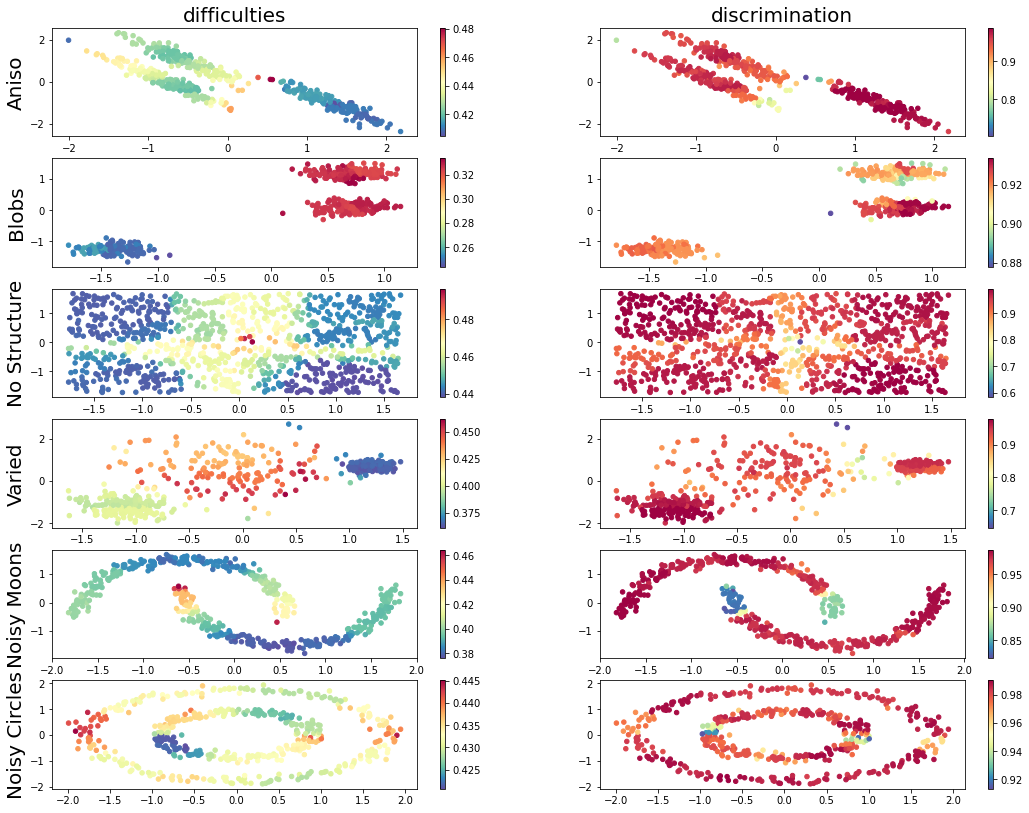

In [15]:
gp = GeneratePlots(data=data)
gp.scatterplot_diff_disc(6, 2, plot_parameters=_plt_parameters)
plt.savefig(os.path.join(path_url_results, "diff_disc_all.eps"), format="eps")